In [101]:
from enum import Enum

In [102]:
#
# Source: https://docs.python.org/3.4/library/enum.html#orderedenum
#
class OrderedEnum(Enum):
    def __ge__(self, other):
        if self.__class__ is other.__class__:
            return self.value >= other.value
        return NotImplemented
    def __gt__(self, other):
        if self.__class__ is other.__class__:
            return self.value > other.value
        return NotImplemented
    def __le__(self, other):
        if self.__class__ is other.__class__:
            return self.value <= other.value
        return NotImplemented
    def __lt__(self, other):
        if self.__class__ is other.__class__:
            return self.value < other.value
        return NotImplemented


In [100]:
class Rank(OrderedEnum):
    ace = 1
    two = 2
    three = 3
    four = 4
    five = 5
    six = 6
    seven = 7
    eight = 8
    nine = 9
    ten = 10
    jack = 11
    queen = 12
    king = 13
    
    @property
    def score(self):
        if (self.value <= 10):
            return self.value
        else:
            return 10

In [ ]:
 Suit = OrderedEnum("Suit", "heart diamond club spade")

In [4]:
class Card(object):
    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit
        
    def __str__(self):
        return "{} of {}s".format(self.rank.name.capitalize(), self.suit.name.capitalize())
    
    def __repr__(self):
        return "{} of {}s".format(self.rank.name.capitalize(), self.suit.name.capitalize())
    
    def __value__(self):
        return self.rank.score()

In [5]:
class Deck(object):
    def __init__(self):
        self.cards = []
        for suit in Suit:
            for rank in Rank:
                card = Card(rank, suit)
                self.cards.append(card)

In [6]:
print(Deck().cards)

[Ace of Hearts, Two of Hearts, Three of Hearts, Four of Hearts, Five of Hearts, Six of Hearts, Seven of Hearts, Eight of Hearts, Nine of Hearts, Ten of Hearts, Jack of Hearts, Queen of Hearts, King of Hearts, Ace of Diamonds, Two of Diamonds, Three of Diamonds, Four of Diamonds, Five of Diamonds, Six of Diamonds, Seven of Diamonds, Eight of Diamonds, Nine of Diamonds, Ten of Diamonds, Jack of Diamonds, Queen of Diamonds, King of Diamonds, Ace of Clubs, Two of Clubs, Three of Clubs, Four of Clubs, Five of Clubs, Six of Clubs, Seven of Clubs, Eight of Clubs, Nine of Clubs, Ten of Clubs, Jack of Clubs, Queen of Clubs, King of Clubs, Ace of Spades, Two of Spades, Three of Spades, Four of Spades, Five of Spades, Six of Spades, Seven of Spades, Eight of Spades, Nine of Spades, Ten of Spades, Jack of Spades, Queen of Spades, King of Spades]


In [7]:
import pandas as pd

In [46]:
df = pd.DataFrame({'card': Deck().cards})
df['suit'] = df.card.map(lambda c: c.suit)
df['rank'] = df.card.map(lambda c: c.rank)
df['score'] = df.card.map(lambda c: c.rank.score)
df.head()

,card,suit,rank,score
0,Ace of Hearts,Suit.heart,Rank.ace,1
1,Two of Hearts,Suit.heart,Rank.two,2
2,Three of Hearts,Suit.heart,Rank.three,3
3,Four of Hearts,Suit.heart,Rank.four,4
4,Five of Hearts,Suit.heart,Rank.five,5


## 1. histogram depicting the relative frequencies of the card values.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1097bf470>]], dtype=object)

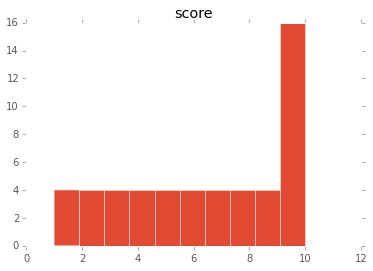

In [124]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

df.hist()

In [96]:
import numpy as np

def take_sample(n=3, replace=False):
    return df.reindex(np.random.permutation(df.index)).head(n)

take_sample()

,card,suit,rank,score
9,Ten of Hearts,Suit.heart,Rank.ten,10
18,Six of Diamonds,Suit.diamond,Rank.six,6
26,Ace of Clubs,Suit.club,Rank.ace,1
